In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Leemos dataset

In [182]:
df = pd.read_csv('data/kaggle_ecommerce.csv')
df

,_unit_id,relevance,relevance:variance,product_image,product_link,product_price,product_title,query,rank,source,first_name,last_name,company_name,address,city,county,state,zip
0,711158459.0,3.67,0.471,http://thumbs2.ebaystatic.com/d/l225/m/mzvzEUI...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$329.98,Sony PlayStation 4 (PS4) (Latest Model)- 500 G...,playstation 4,1.0,eBay,James,Butt,"Benton, John B Jr",6649 N Blue Gum St,New Orleans,Orleans,LA,70116.0
1,711158460.0,4.00,0.000,http://thumbs3.ebaystatic.com/d/l225/m/mJNDmSy...,http://www.ebay.com/itm/Sony-PlayStation-4-Lat...,$324.84,Sony PlayStation 4 (Latest Model)- 500 GB Jet ...,playstation 4,2.0,eBay,Josephine,Darakjy,"Chanay, Jeffrey A Esq",4 B Blue Ridge Blvd,Brighton,Livingston,MI,48116.0
2,711158461.0,4.00,0.000,http://thumbs4.ebaystatic.com/d/l225/m/m10NZXA...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$324.83,Sony PlayStation 4 PS4 500 GB Jet Black Console,playstation 4,3.0,eBay,Art,Venere,"Chemel, James L Cpa",8 W Cerritos Ave #54,Bridgeport,Gloucester,NJ,8014.0
3,711158462.0,3.67,0.471,http://thumbs2.ebaystatic.com/d/l225/m/mZZXTmA...,http://www.ebay.com/itm/Sony-PlayStation-4-500...,$350.00,Sony - PlayStation 4 500GB The Last of Us Rema...,playstation 4,4.0,eBay,Lenna,Paprocki,Feltz Printing Service,639 Main St,Anchorage,Anchorage,AK,99501.0
4,711158463.0,3.33,0.471,http://thumbs3.ebaystatic.com/d/l225/m/mzvzEUI...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$308.00,Sony PlayStation 4 (PS4) (Latest Model)- 500 G...,playstation 4,5.0,eBay,Donette,Foller,Printing Dimensions,34 Center St,Hamilton,Butler,OH,45011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32669,713196636.0,NaN,NaN,http://edge.shop.com/ccimg.shop.com/250000/250...,http://www.shop.com/nbts/p957783018-xinternals...,$169.00,Maine Pac Boots,snow boots,33.0,Shop.com,Lizbeth,Kohl,E T Balancing Co Inc,35433 Blake St #588,Gardena,Los Angeles,CA,90248.0
32670,713196637.0,NaN,NaN,http://edge.shop.com/ccimg.shop.com/240000/243...,http://www.shop.com/nbts/p1237032619-xinternal...,$39.99,"Itasca Icebreaker Snow Boots - Waterproof, Ins...",snow boots,34.0,Shop.com,Glenn,Berray,"Griswold, John E Esq",29 Cherry St #7073,Des Moines,Polk,IA,50315.0
32671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Tipos de datos en el dataset

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32674 entries, 0 to 32673
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _unit_id            32671 non-null  float64
 1   relevance           20571 non-null  float64
 2   relevance:variance  20571 non-null  float64
 3   product_image       32671 non-null  object 
 4   product_link        32671 non-null  object 
 5   product_price       32671 non-null  object 
 6   product_title       32671 non-null  object 
 7   query               32671 non-null  object 
 8   rank                32671 non-null  float64
 9   source              32671 non-null  object 
 10  first_name          32669 non-null  object 
 11  last_name           32669 non-null  object 
 12  company_name        32669 non-null  object 
 13  address             32669 non-null  object 
 14  city                32669 non-null  object 
 15  county              32669 non-null  object 
 16  stat

### Eliminamos columnas innecesarias

In [184]:
df.drop(['product_image', 'product_link', 'product_title', 'relevance', 'relevance:variance', 'rank', 'company_name', 'address'], axis=1, inplace=True)
df['clien_id'] = df['zip']
df

,_unit_id,product_price,query,source,first_name,last_name,city,county,state,zip,clien_id
0,711158459.0,$329.98,playstation 4,eBay,James,Butt,New Orleans,Orleans,LA,70116.0,70116.0
1,711158460.0,$324.84,playstation 4,eBay,Josephine,Darakjy,Brighton,Livingston,MI,48116.0,48116.0
2,711158461.0,$324.83,playstation 4,eBay,Art,Venere,Bridgeport,Gloucester,NJ,8014.0,8014.0
3,711158462.0,$350.00,playstation 4,eBay,Lenna,Paprocki,Anchorage,Anchorage,AK,99501.0,99501.0
4,711158463.0,$308.00,playstation 4,eBay,Donette,Foller,Hamilton,Butler,OH,45011.0,45011.0
...,...,...,...,...,...,...,...,...,...,...,...
32669,713196636.0,$169.00,snow boots,Shop.com,Lizbeth,Kohl,Gardena,Los Angeles,CA,90248.0,90248.0
32670,713196637.0,$39.99,snow boots,Shop.com,Glenn,Berray,Des Moines,Polk,IA,50315.0,50315.0
32671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### La columna product_price tiene muchos tipos de datos

In [185]:
df['product_price'].value_counts()

$19.99                  503
$29.99                  424
$39.99                  386
$24.99                  352
$49.99                  330
                       ... 
$27.99 - $75.00           1
$118.50                   1
$665.14,Sale $465.60      1
$131.00 - $166.91         1
$76.70                    1
Name: product_price, Length: 11240, dtype: int64

### Limpiamos y convertimos el tipo de dato de "object" a "float"

In [186]:
df["price"]=df['product_price'].str[1:6]
df

,_unit_id,product_price,query,source,first_name,last_name,city,county,state,zip,clien_id,price
0,711158459.0,$329.98,playstation 4,eBay,James,Butt,New Orleans,Orleans,LA,70116.0,70116.0,329.9
1,711158460.0,$324.84,playstation 4,eBay,Josephine,Darakjy,Brighton,Livingston,MI,48116.0,48116.0,324.8
2,711158461.0,$324.83,playstation 4,eBay,Art,Venere,Bridgeport,Gloucester,NJ,8014.0,8014.0,324.8
3,711158462.0,$350.00,playstation 4,eBay,Lenna,Paprocki,Anchorage,Anchorage,AK,99501.0,99501.0,350.0
4,711158463.0,$308.00,playstation 4,eBay,Donette,Foller,Hamilton,Butler,OH,45011.0,45011.0,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32669,713196636.0,$169.00,snow boots,Shop.com,Lizbeth,Kohl,Gardena,Los Angeles,CA,90248.0,90248.0,169.0
32670,713196637.0,$39.99,snow boots,Shop.com,Glenn,Berray,Des Moines,Polk,IA,50315.0,50315.0,39.99
32671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df = df.drop([32671,32672,32673])
df

,_unit_id,product_price,query,source,first_name,last_name,city,county,state,zip,clien_id,price
0,711158459.0,$329.98,playstation 4,eBay,James,Butt,New Orleans,Orleans,LA,70116.0,70116.0,329.9
1,711158460.0,$324.84,playstation 4,eBay,Josephine,Darakjy,Brighton,Livingston,MI,48116.0,48116.0,324.8
2,711158461.0,$324.83,playstation 4,eBay,Art,Venere,Bridgeport,Gloucester,NJ,8014.0,8014.0,324.8
3,711158462.0,$350.00,playstation 4,eBay,Lenna,Paprocki,Anchorage,Anchorage,AK,99501.0,99501.0,350.0
4,711158463.0,$308.00,playstation 4,eBay,Donette,Foller,Hamilton,Butler,OH,45011.0,45011.0,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32666,713196633.0,$109.99,snow boots,Shop.com,Gail,Kitty,Anchorage,Anchorage,AK,99501.0,99501.0,109.9
32667,713196634.0,$175.00,snow boots,Shop.com,Dalene,Schoeneck,Philadelphia,Philadelphia,PA,19102.0,19102.0,175.0
32668,713196635.0,$175.00,snow boots,Shop.com,Gertude,Witten,Cincinnati,Hamilton,OH,45217.0,45217.0,175.0
32669,713196636.0,$169.00,snow boots,Shop.com,Lizbeth,Kohl,Gardena,Los Angeles,CA,90248.0,90248.0,169.0


In [188]:
df.drop(['product_price', 'zip'], axis=1, inplace=True)
df

,_unit_id,query,source,first_name,last_name,city,county,state,clien_id,price
0,711158459.0,playstation 4,eBay,James,Butt,New Orleans,Orleans,LA,70116.0,329.9
1,711158460.0,playstation 4,eBay,Josephine,Darakjy,Brighton,Livingston,MI,48116.0,324.8
2,711158461.0,playstation 4,eBay,Art,Venere,Bridgeport,Gloucester,NJ,8014.0,324.8
3,711158462.0,playstation 4,eBay,Lenna,Paprocki,Anchorage,Anchorage,AK,99501.0,350.0
4,711158463.0,playstation 4,eBay,Donette,Foller,Hamilton,Butler,OH,45011.0,308.0
...,...,...,...,...,...,...,...,...,...,...
32666,713196633.0,snow boots,Shop.com,Gail,Kitty,Anchorage,Anchorage,AK,99501.0,109.9
32667,713196634.0,snow boots,Shop.com,Dalene,Schoeneck,Philadelphia,Philadelphia,PA,19102.0,175.0
32668,713196635.0,snow boots,Shop.com,Gertude,Witten,Cincinnati,Hamilton,OH,45217.0,175.0
32669,713196636.0,snow boots,Shop.com,Lizbeth,Kohl,Gardena,Los Angeles,CA,90248.0,169.0


In [189]:
df1=df[df["price"] == "ale $"].index
df1=df.drop(df1)
df2=df1[df1["price"] == "eg:\np"].index
df2=df1.drop(df2)
df3=df2[df2["price"] == "ist:\n"].index
df3=df2.drop(df3)
df3

,_unit_id,query,source,first_name,last_name,city,county,state,clien_id,price
0,711158459.0,playstation 4,eBay,James,Butt,New Orleans,Orleans,LA,70116.0,329.9
1,711158460.0,playstation 4,eBay,Josephine,Darakjy,Brighton,Livingston,MI,48116.0,324.8
2,711158461.0,playstation 4,eBay,Art,Venere,Bridgeport,Gloucester,NJ,8014.0,324.8
3,711158462.0,playstation 4,eBay,Lenna,Paprocki,Anchorage,Anchorage,AK,99501.0,350.0
4,711158463.0,playstation 4,eBay,Donette,Foller,Hamilton,Butler,OH,45011.0,308.0
...,...,...,...,...,...,...,...,...,...,...
32666,713196633.0,snow boots,Shop.com,Gail,Kitty,Anchorage,Anchorage,AK,99501.0,109.9
32667,713196634.0,snow boots,Shop.com,Dalene,Schoeneck,Philadelphia,Philadelphia,PA,19102.0,175.0
32668,713196635.0,snow boots,Shop.com,Gertude,Witten,Cincinnati,Hamilton,OH,45217.0,175.0
32669,713196636.0,snow boots,Shop.com,Lizbeth,Kohl,Gardena,Los Angeles,CA,90248.0,169.0


In [190]:
df3['price'] = df3['price'].str.replace(',','')
df3['price']

0        329.9
1        324.8
2        324.8
3        350.0
4        308.0
         ...  
32666    109.9
32667    175.0
32668    175.0
32669    169.0
32670    39.99
Name: price, Length: 32103, dtype: object

In [191]:
df3['price'] = df3['price'].astype('float64')
df3['price'].dtype

dtype('float64')

In [192]:
df3['source'].value_counts()

Shop.com     12603
Overstock     7536
walmart       4840
eBay          4179
Target        2945
Name: source, dtype: int64

In [193]:
df3['query'].value_counts()

bike lock                  294
rachel ray cookware        252
memory foam pillow         234
wii                        201
full tang knife            198
                          ... 
silicone toe separators     21
dollhouse bathtub           20
polo bear sweater           16
macbook case 13 case"        2
samsonite"                   1
Name: query, Length: 264, dtype: int64

In [194]:
df3['clien_id'].value_counts()

90248.0    290
37211.0    210
94104.0    192
77301.0    186
94545.0    185
          ... 
83709.0     20
46514.0     14
69301.0     14
98104.0     14
32804.0     13
Name: clien_id, Length: 451, dtype: int64

In [195]:
df4 = df3.groupby(['clien_id', 'query']).size()
df4

clien_id  query                            
1581.0    16 gb memory card                    1
          8 ounce mason jars                   1
          Brett Favre NY Titans jersey blue    1
          Cocoa Butter                         1
          Sunglasses polarized                 1
                                              ..
99712.0   spiderman                            1
          storage ottoman                      1
          sweater dress                        1
          toddler sandals                      1
          wall clocks                          1
Length: 27640, dtype: int64

In [196]:
temp = df4.unstack(level=-1)
temp

query,16 gb memory card,8 ounce mason jars,Assassinss Creed,Bird seed feeder,Bluray Hobbit extended,Brett Favre NY Titans jersey blue,Cocoa Butter,Dc shoes black,Donut Shoppe K Cups,LED monitor,...,wireless mouse,workout clothes for women,wreck it ralph,yankee candle,yankees,yellow dress,yoga mat,yoga pants,zippo,zippo hand warmer
clien_id,,,,,,,,,,,,,,,,,,,,,
1581.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
1602.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN
1603.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1742.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
1887.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99352.0,2.0,NaN,1.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
99501.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,2.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,1.0,NaN
99515.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
online = temp.reset_index().fillna(0).set_index('clien_id')
online

query,16 gb memory card,8 ounce mason jars,Assassinss Creed,Bird seed feeder,Bluray Hobbit extended,Brett Favre NY Titans jersey blue,Cocoa Butter,Dc shoes black,Donut Shoppe K Cups,LED monitor,...,wireless mouse,workout clothes for women,wreck it ralph,yankee candle,yankees,yellow dress,yoga mat,yoga pants,zippo,zippo hand warmer
clien_id,,,,,,,,,,,,,,,,,,,,,
1581.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1602.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
1603.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1742.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1887.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99352.0,2.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99501.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0
99515.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
online.columns

Index(['16 gb memory card', '8 ounce mason jars', 'Assassinss Creed',
       'Bird seed feeder', 'Bluray Hobbit extended',
       'Brett Favre NY Titans jersey blue', 'Cocoa Butter', 'Dc shoes black',
       'Donut Shoppe K Cups', 'LED monitor',
       ...
       'wireless mouse', 'workout clothes for women', 'wreck it ralph',
       'yankee candle', 'yankees', 'yellow dress', 'yoga mat', 'yoga pants',
       'zippo', 'zippo hand warmer'],
      dtype='object', name='query', length=264)

In [199]:
online.loc[99501,'laptop lenovo']

2.0

In [200]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
online_sets = online.applymap(encode_units)
online_sets

query,16 gb memory card,8 ounce mason jars,Assassinss Creed,Bird seed feeder,Bluray Hobbit extended,Brett Favre NY Titans jersey blue,Cocoa Butter,Dc shoes black,Donut Shoppe K Cups,LED monitor,...,wireless mouse,workout clothes for women,wreck it ralph,yankee candle,yankees,yellow dress,yoga mat,yoga pants,zippo,zippo hand warmer
clien_id,,,,,,,,,,,,,,,,,,,,,
1581.0,1,1,0,0,0,1,1,0,0,0,...,1,0,1,1,1,0,0,1,0,0
1602.0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,0,0
1603.0,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1742.0,0,0,1,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,1
1887.0,0,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99352.0,1,0,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
99501.0,1,0,0,1,0,0,1,1,0,0,...,1,0,0,1,1,0,0,1,1,0
99515.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
frq_items = apriori(online_sets, min_support = 0.07, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
571910,"(keurig coffee maker, hello kitty, adidas pants)",(oakley polarized radar),0.070953,0.073171,0.070953,1.0,13.666667,0.065762,inf
571952,"(hello kitty, adidas pants, wall mirrors)",(oakley polarized radar),0.070953,0.073171,0.070953,1.0,13.666667,0.065762,inf
1158779,"(keurig coffee maker, Single serve coffee make...",(oakley polarized radar),0.070953,0.073171,0.070953,1.0,13.666667,0.065762,inf
1158790,"(keurig coffee maker, hello kitty, adidas pants)","(Single serve coffee maker, oakley polarized r...",0.070953,0.073171,0.070953,1.0,13.666667,0.065762,inf
1158840,"(Single serve coffee maker, hello kitty, adida...",(oakley polarized radar),0.070953,0.073171,0.070953,1.0,13.666667,0.065762,inf


In [178]:
frq_items = apriori(online_sets, min_support = 0.08, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.5) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
376105,"(Levis, flea and tick control for dogs, wall c...","(coffee for nespresso, lego star wars, solar b...",0.086475,0.088692,0.086475,1.0,11.275,0.078805,inf
396665,"(Levis, macbook case 13 case, flea and tick co...","(lego star wars, coffee for nespresso, solar b...",0.082040,0.088692,0.082040,1.0,11.275,0.074764,inf
396780,"(Levis, table runner, flea and tick control fo...","(coffee for nespresso, lego star wars, solar b...",0.082040,0.088692,0.082040,1.0,11.275,0.074764,inf
398247,"(full tang knife, beats headphones)","(portable hard drive, electric griddle, galaxy...",0.086475,0.088692,0.086475,1.0,11.275,0.078805,inf
400641,"(full tang knife, beats headphones)","(portable hard drive, galaxy note 3, rachel ra...",0.086475,0.088692,0.086475,1.0,11.275,0.078805,inf


In [249]:
df3

,_unit_id,query,source,first_name,last_name,city,county,state,clien_id,price
0,711158459.0,playstation 4,eBay,James,Butt,New Orleans,Orleans,LA,70116.0,329.90
1,711158460.0,playstation 4,eBay,Josephine,Darakjy,Brighton,Livingston,MI,48116.0,324.80
2,711158461.0,playstation 4,eBay,Art,Venere,Bridgeport,Gloucester,NJ,8014.0,324.80
3,711158462.0,playstation 4,eBay,Lenna,Paprocki,Anchorage,Anchorage,AK,99501.0,350.00
4,711158463.0,playstation 4,eBay,Donette,Foller,Hamilton,Butler,OH,45011.0,308.00
...,...,...,...,...,...,...,...,...,...,...
32666,713196633.0,snow boots,Shop.com,Gail,Kitty,Anchorage,Anchorage,AK,99501.0,109.90
32667,713196634.0,snow boots,Shop.com,Dalene,Schoeneck,Philadelphia,Philadelphia,PA,19102.0,175.00
32668,713196635.0,snow boots,Shop.com,Gertude,Witten,Cincinnati,Hamilton,OH,45217.0,175.00
32669,713196636.0,snow boots,Shop.com,Lizbeth,Kohl,Gardena,Los Angeles,CA,90248.0,169.00


In [250]:
df3.state.unique()

array(['LA', 'MI', 'NJ', 'AK', 'OH', 'IL', 'CA', 'SD', 'MD', 'PA', 'NY',
       'TX', 'AZ', 'TN', 'WI', 'KS', 'NM', 'OR', 'FL', 'MN', 'MA', 'SC',
       'RI', 'CO', 'ID', 'NC', 'IN', 'WY', 'VA', 'HI', 'GA', 'AR', 'NV',
       'ME', 'WA', 'MS', 'CT', 'MO', 'NH', 'ND', 'MT', 'IA', 'OK', 'KY',
       'UT', 'NE', 'DC', nan], dtype=object)

In [251]:
state_1 = df3.groupby(['state', 'source']).size()
state_1

state  source   
AK     Overstock     92
       Shop.com     139
       Target        32
       eBay          29
       walmart       18
                   ... 
WY     Overstock     38
       Shop.com      69
       Target        18
       eBay          22
       walmart       25
Length: 234, dtype: int64

In [252]:
temp1 = state_1.unstack(level=-1)
temp1

source,Overstock,Shop.com,Target,eBay,walmart
state,,,,,
AK,92.0,139.0,32.0,29.0,18.0
AR,18.0,24.0,6.0,7.0,14.0
AZ,127.0,232.0,52.0,98.0,101.0
CA,1144.0,1782.0,432.0,579.0,705.0
CO,121.0,211.0,47.0,77.0,75.0
CT,66.0,148.0,33.0,58.0,65.0
DC,2.0,12.0,1.0,11.0,8.0
FL,403.0,702.0,159.0,231.0,292.0
GA,104.0,194.0,42.0,73.0,85.0


In [253]:
state_2 = df3.groupby(['state', 'query']).size()
state_2

state  query                            
AK     16 gb memory card                    2
       Bird seed feeder                     1
       Brett Favre NY Titans jersey blue    1
       Cocoa Butter                         3
       Dc shoes black                       3
                                           ..
WY     white dress                          1
       wine rack                            1
       wreck it ralph                       1
       yankees                              1
       zippo hand warmer                    1
Length: 7929, dtype: int64

In [259]:
temp2 = state_2.unstack(level=-1)
temp2

query,16 gb memory card,8 ounce mason jars,Assassinss Creed,Bird seed feeder,Bluray Hobbit extended,Brett Favre NY Titans jersey blue,Cocoa Butter,Dc shoes black,Donut Shoppe K Cups,LED monitor,...,wireless mouse,workout clothes for women,wreck it ralph,yankee candle,yankees,yellow dress,yoga mat,yoga pants,zippo,zippo hand warmer
state,,,,,,,,,,,,,,,,,,,,,
AK,2.0,NaN,NaN,1.0,NaN,1.0,3.0,3.0,NaN,NaN,...,2.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,1.0,NaN
AR,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
AZ,6.0,1.0,7.0,3.0,2.0,1.0,1.0,2.0,1.0,3.0,...,4.0,4.0,3.0,1.0,2.0,2.0,1.0,3.0,NaN,3.0
CA,23.0,9.0,26.0,27.0,13.0,20.0,21.0,19.0,4.0,20.0,...,24.0,18.0,36.0,26.0,21.0,21.0,24.0,22.0,16.0,7.0
CO,5.0,NaN,2.0,5.0,1.0,2.0,2.0,1.0,1.0,NaN,...,3.0,2.0,3.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0
CT,3.0,NaN,NaN,2.0,1.0,2.0,4.0,2.0,1.0,NaN,...,4.0,1.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,5.0
DC,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL,10.0,3.0,13.0,10.0,6.0,7.0,9.0,6.0,1.0,7.0,...,6.0,12.0,15.0,12.0,7.0,10.0,14.0,5.0,6.0,6.0
GA,1.0,NaN,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,...,7.0,4.0,2.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0


In [260]:
online1 = temp2.reset_index().fillna(0).set_index('state')
online1

query,16 gb memory card,8 ounce mason jars,Assassinss Creed,Bird seed feeder,Bluray Hobbit extended,Brett Favre NY Titans jersey blue,Cocoa Butter,Dc shoes black,Donut Shoppe K Cups,LED monitor,...,wireless mouse,workout clothes for women,wreck it ralph,yankee candle,yankees,yellow dress,yoga mat,yoga pants,zippo,zippo hand warmer
state,,,,,,,,,,,,,,,,,,,,,
AK,2.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0
AR,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
AZ,6.0,1.0,7.0,3.0,2.0,1.0,1.0,2.0,1.0,3.0,...,4.0,4.0,3.0,1.0,2.0,2.0,1.0,3.0,0.0,3.0
CA,23.0,9.0,26.0,27.0,13.0,20.0,21.0,19.0,4.0,20.0,...,24.0,18.0,36.0,26.0,21.0,21.0,24.0,22.0,16.0,7.0
CO,5.0,0.0,2.0,5.0,1.0,2.0,2.0,1.0,1.0,0.0,...,3.0,2.0,3.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0
CT,3.0,0.0,0.0,2.0,1.0,2.0,4.0,2.0,1.0,0.0,...,4.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,5.0
DC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FL,10.0,3.0,13.0,10.0,6.0,7.0,9.0,6.0,1.0,7.0,...,6.0,12.0,15.0,12.0,7.0,10.0,14.0,5.0,6.0,6.0
GA,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,...,7.0,4.0,2.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0


In [261]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
online_sets1 = online1.applymap(encode_units)
online_sets1

query,16 gb memory card,8 ounce mason jars,Assassinss Creed,Bird seed feeder,Bluray Hobbit extended,Brett Favre NY Titans jersey blue,Cocoa Butter,Dc shoes black,Donut Shoppe K Cups,LED monitor,...,wireless mouse,workout clothes for women,wreck it ralph,yankee candle,yankees,yellow dress,yoga mat,yoga pants,zippo,zippo hand warmer
state,,,,,,,,,,,,,,,,,,,,,
AK,1,0,0,1,0,1,1,1,0,0,...,1,0,0,1,1,0,0,1,1,0
AR,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
AZ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
CA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CO,1,0,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1
CT,1,0,0,1,1,1,1,1,1,0,...,1,1,0,1,1,1,1,0,0,1
DC,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
FL,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GA,1,0,0,1,0,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1


In [262]:
frq_items1 = apriori(online_sets1, min_support = 0.7, use_colnames = True) 
rules = association_rules(frq_items1, metric ="lift", min_threshold = 0.5) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4154,"(cargo shorts, wall mirrors)","(galaxy note 3, button down shirt)",0.702128,0.702128,0.702128,1.0,1.424242,0.209144,inf
4159,"(galaxy note 3, button down shirt)","(cargo shorts, wall mirrors)",0.702128,0.702128,0.702128,1.0,1.424242,0.209144,inf
4406,"(speck iphone 5 case, routers)","(wall mirrors, kitchen rugs)",0.702128,0.702128,0.702128,1.0,1.424242,0.209144,inf
4411,"(wall mirrors, kitchen rugs)","(speck iphone 5 case, routers)",0.702128,0.702128,0.702128,1.0,1.424242,0.209144,inf
1679,(flower bulbs),"(full tang knife, bluetooth speaker)",0.702128,0.723404,0.702128,1.0,1.382353,0.194206,inf


In [263]:
frq_items1 = apriori(online_sets1, min_support = 0.75, use_colnames = True) 
rules = association_rules(frq_items1, metric ="lift", min_threshold = 0.5) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(wall clocks),"(galaxy note 3, bike lock)",0.765957,0.787234,0.765957,1.0,1.270270,0.162970,inf
17,(wall clocks),(galaxy note 3),0.765957,0.808511,0.765957,1.0,1.236842,0.146673,inf
26,"(wall clocks, bike lock)",(galaxy note 3),0.765957,0.808511,0.765957,1.0,1.236842,0.146673,inf
10,(wall clocks),(bike lock),0.765957,0.829787,0.765957,1.0,1.205128,0.130376,inf
24,"(galaxy note 3, wall clocks)",(bike lock),0.765957,0.829787,0.765957,1.0,1.205128,0.130376,inf


C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daniela.Villalobos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


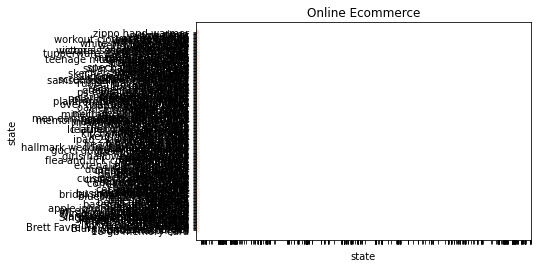

In [265]:
p = online_sets1.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g = sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('state')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(online_sets.index)
    g.set_yticklabels(online_sets.columns)
    plt.title("Online Ecommerce")